In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import sklearn

import warnings
warnings.filterwarnings('ignore')

In [2]:
ds=pd.read_csv('Telecom_customer_churn.csv')
ds.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
ds.sample(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1018,3748-FVMZZ,Male,0,No,No,4,No,No phone service,DSL,No,...,No,Yes,No,Yes,Month-to-month,Yes,Electronic check,40.05,162.45,No
4433,4749-OJKQU,Female,0,No,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,75.65,302.35,No
3166,9097-ZUBYC,Male,0,Yes,No,14,Yes,No,DSL,No,...,No,Yes,No,No,Month-to-month,No,Bank transfer (automatic),48.80,664.4,No


In [4]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
ds.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [6]:
ds.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [7]:
# lets us group the variables in int and categorical variables

ds.columns.to_series().groupby(ds.dtypes).groups

{int64: ['SeniorCitizen', 'tenure'], float64: ['MonthlyCharges'], object: ['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges', 'Churn']}

In [8]:
# lets check if we have null values

ds.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [9]:
# lets reconfirm we dont have any missing values

ds.isna().any()

customerID          False
gender              False
SeniorCitizen       False
Partner             False
Dependents          False
tenure              False
PhoneService        False
MultipleLines       False
InternetService     False
OnlineSecurity      False
OnlineBackup        False
DeviceProtection    False
TechSupport         False
StreamingTV         False
StreamingMovies     False
Contract            False
PaperlessBilling    False
PaymentMethod       False
MonthlyCharges      False
TotalCharges        False
Churn               False
dtype: bool

In [10]:
ds['TotalCharges'].unique()

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [11]:
ds['Churn'].unique()

array(['No', 'Yes'], dtype=object)

In [12]:
#lets check the Target variable distiribution(churn)

ds['Churn'].value_counts()


No     5174
Yes    1869
Name: Churn, dtype: int64

In [13]:
ds.shape

(7043, 21)

In [14]:
# lets scheck if we have any blank space in the dataset

ds.loc[ds['TotalCharges']== ' ']

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [15]:
ds.loc[ds['Churn']== ' ']

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


In [16]:
ds.shape

(7043, 21)

In [17]:
ds.shape[1]

21

In [18]:
ds.shape[0]

7043

In [19]:
# we have to replace the black value

ds['TotalCharges']=ds['TotalCharges'].replace(' ', np.nan)

In [20]:
ds.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [21]:
ds['TotalCharges']=ds['TotalCharges'].astype(float)

In [22]:
ds.TotalCharges.dtypes

dtype('float64')

In [23]:
# as we have soem blank spave , we will have to handel it with nan values with mean

np.mean(ds['TotalCharges'])

2283.3004408418697

In [24]:
ds.iloc[6670,:]

customerID            4075-WKNIU
gender                    Female
SeniorCitizen                  0
Partner                      Yes
Dependents                   Yes
tenure                         0
PhoneService                 Yes
MultipleLines                Yes
InternetService              DSL
OnlineSecurity                No
OnlineBackup                 Yes
DeviceProtection             Yes
TechSupport                  Yes
StreamingTV                  Yes
StreamingMovies               No
Contract                Two year
PaperlessBilling              No
PaymentMethod       Mailed check
MonthlyCharges             73.35
TotalCharges                 NaN
Churn                         No
Name: 6670, dtype: object

In [25]:
# this is a Dependent variable
# replacing the nan values with mean values

ds['TotalCharges']= ds['TotalCharges'].fillna(np.mean(ds['TotalCharges']))

In [26]:
ds.iloc[6670,:]

customerID            4075-WKNIU
gender                    Female
SeniorCitizen                  0
Partner                      Yes
Dependents                   Yes
tenure                         0
PhoneService                 Yes
MultipleLines                Yes
InternetService              DSL
OnlineSecurity                No
OnlineBackup                 Yes
DeviceProtection             Yes
TechSupport                  Yes
StreamingTV                  Yes
StreamingMovies               No
Contract                Two year
PaperlessBilling              No
PaymentMethod       Mailed check
MonthlyCharges             73.35
TotalCharges         2283.300441
Churn                         No
Name: 6670, dtype: object

In [27]:
ds.shape

(7043, 21)

In [28]:
# we didnot drop anything. we simply replaced with it mean values

In [29]:
ds.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [30]:
ds.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [31]:
# let us seperate our categorical and numerical variables

ds_visualization_nominal=ds[['gender','SeniorCitizen','Partner','Dependents','PhoneService','MultipleLines','InternetService',
                           'OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract',
                           'PaperlessBilling','PaymentMethod','Churn']].copy()

In [32]:
ds_visualization_nominal.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')

# Data Visualization

In [33]:
import seaborn as sns

Male      3555
Female    3488
Name: gender, dtype: int64


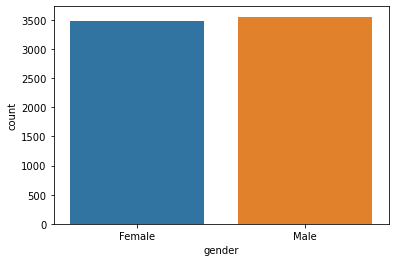

In [34]:
ax= sns.countplot(x='gender', data=ds_visualization_nominal)
print(ds_visualization_nominal['gender'].value_counts())

In [35]:
# from the above obsrvation male customers are 3555 and females are 3488

0    5901
1    1142
Name: SeniorCitizen, dtype: int64


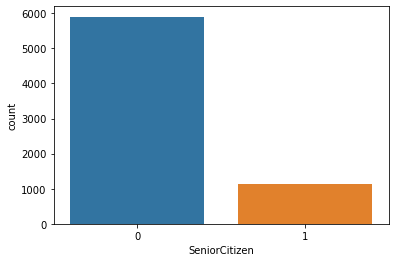

In [36]:
ax= sns.countplot(x='SeniorCitizen', data=ds_visualization_nominal)
print(ds_visualization_nominal['SeniorCitizen'].value_counts())

In [37]:
# from the above chart we can see young people are 5901 and senior citizens are only 1142

No     3641
Yes    3402
Name: Partner, dtype: int64


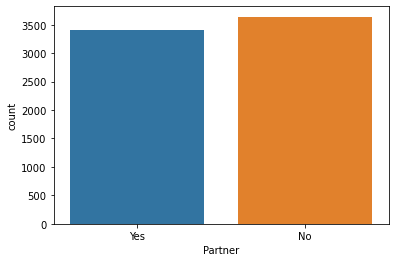

In [39]:
ax= sns.countplot(x='Partner', data=ds_visualization_nominal)
print(ds_visualization_nominal['Partner'].value_counts())

In [40]:
# we can clearly see that 3402 customer opted for partener and 3641 didnot opt

No     4933
Yes    2110
Name: Dependents, dtype: int64


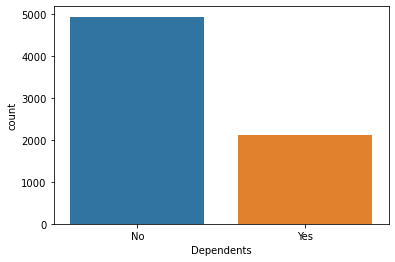

In [41]:
ax= sns.countplot(x='Dependents', data=ds_visualization_nominal)
print(ds_visualization_nominal['Dependents'].value_counts())

In [42]:
# we can see that 4933 customers added dependent and 2110 didnot add any dependent 

Yes    6361
No      682
Name: PhoneService, dtype: int64


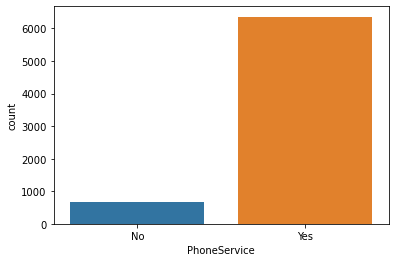

In [43]:
ax= sns.countplot(x='PhoneService', data=ds_visualization_nominal)
print(ds_visualization_nominal['PhoneService'].value_counts())

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64


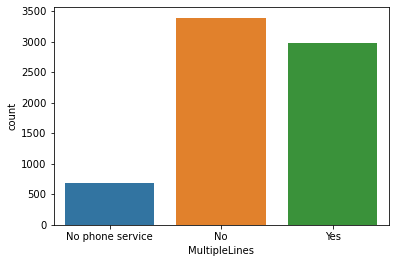

In [44]:
ax= sns.countplot(x='MultipleLines', data=ds_visualization_nominal)
print(ds_visualization_nominal['MultipleLines'].value_counts())

In [45]:
# we can see that 682 customer has no phone service for multiple lines.  2971 has
# multiple line and 3390 customers dosenot opt for multiple line

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64


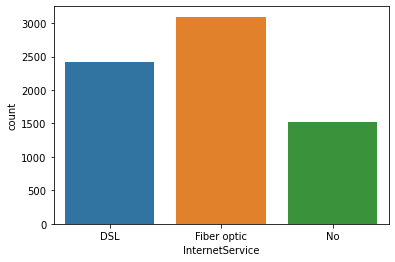

In [46]:
ax= sns.countplot(x='InternetService', data=ds_visualization_nominal)
print(ds_visualization_nominal['InternetService'].value_counts())

In [47]:
# we can observe 3096 customer opted for fiber optic internet service . 2421 opted for DSL and 1526 has not opted for any internet service

No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64


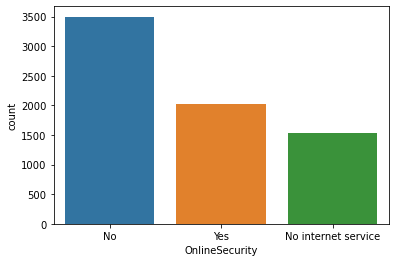

In [48]:
ax= sns.countplot(x='OnlineSecurity', data=ds_visualization_nominal)
print(ds_visualization_nominal['OnlineSecurity'].value_counts())

In [49]:
# from the above chart it is clear that3498 customer has no online security. 2019 customer has online security. and 1526 customers doesnt have internet service so no online security

No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64


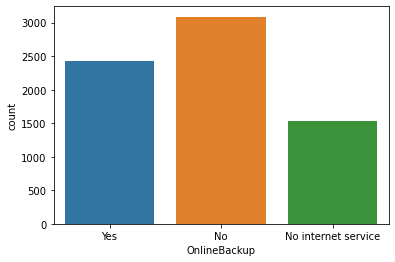

In [50]:
ax= sns.countplot(x='OnlineBackup', data=ds_visualization_nominal)
print(ds_visualization_nominal['OnlineBackup'].value_counts())

In [51]:
# we can see that 3088 customers has no online backup. 2429 has online backup. and 1526 has no internet service so no online backup

No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64


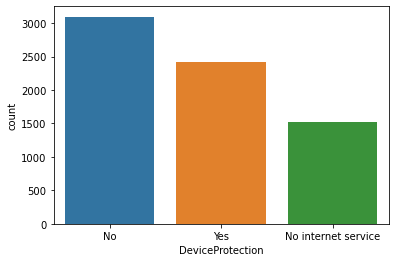

In [52]:
ax= sns.countplot(x='DeviceProtection', data=ds_visualization_nominal)
print(ds_visualization_nominal['DeviceProtection'].value_counts())

In [53]:
# 2422 customers opted for device protection servicesfrom the company. 3095 didnot opt for it. and 1526 has no iternet service

No                     3473
Yes                    2044
No internet service    1526
Name: TechSupport, dtype: int64


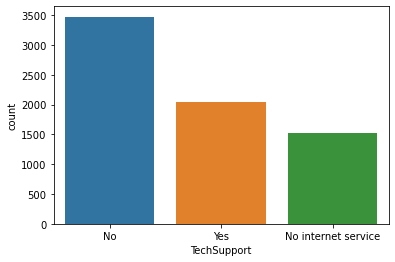

In [54]:
ax= sns.countplot(x='TechSupport', data=ds_visualization_nominal)
print(ds_visualization_nominal['TechSupport'].value_counts())

In [55]:
# 2044 customers has asked for techsupport. 3473 didnot ask for. and 1526 has no internet serivec

No                     2810
Yes                    2707
No internet service    1526
Name: StreamingTV, dtype: int64


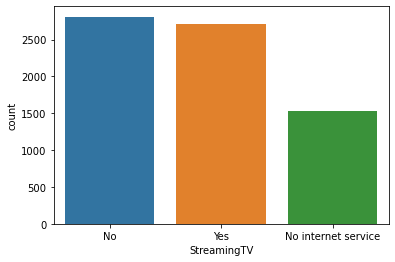

In [56]:
ax= sns.countplot(x='StreamingTV', data=ds_visualization_nominal)
print(ds_visualization_nominal['StreamingTV'].value_counts())

In [57]:
# 2707 customers opted for streaming TV. 2810 Not opted for it. for 1526 no internet service

No                     2785
Yes                    2732
No internet service    1526
Name: StreamingMovies, dtype: int64


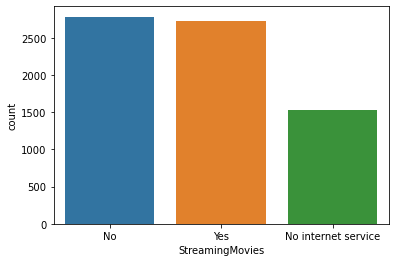

In [58]:
ax= sns.countplot(x='StreamingMovies', data=ds_visualization_nominal)
print(ds_visualization_nominal['StreamingMovies'].value_counts())

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64


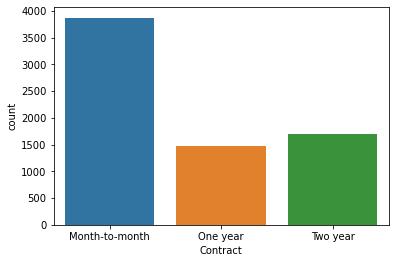

In [59]:
ax= sns.countplot(x='Contract', data=ds_visualization_nominal)
print(ds_visualization_nominal['Contract'].value_counts())

In [60]:

# we can see from the above chart that 3875 customers has momth-to-month contract.
# 1695has two year contract and 1473 has one year contract with the company

Yes    4171
No     2872
Name: PaperlessBilling, dtype: int64


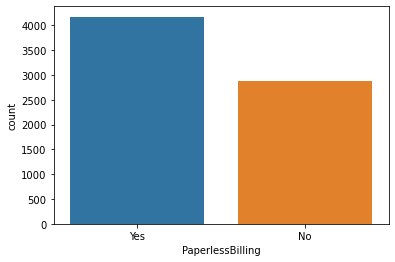

In [61]:
ax= sns.countplot(x='PaperlessBilling', data=ds_visualization_nominal)
print(ds_visualization_nominal['PaperlessBilling'].value_counts())

In [62]:
# we can see that 4171 customer opted for paperless billing and 2872 opted for regular biliing

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64


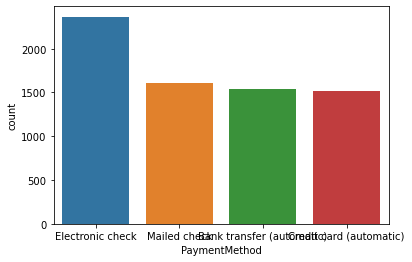

In [63]:
ax= sns.countplot(x='PaymentMethod', data=ds_visualization_nominal)
print(ds_visualization_nominal['PaymentMethod'].value_counts())

In [64]:
# we can see various payment method . most customers paid using electronic check .

No     5174
Yes    1869
Name: Churn, dtype: int64


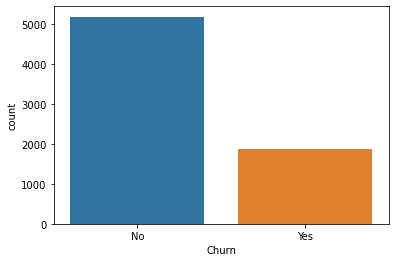

In [65]:
ax= sns.countplot(x='Churn', data=ds_visualization_nominal)
print(ds_visualization_nominal['Churn'].value_counts())

Making dataframe for the ordinal data

In [66]:
ds_visualization_ordinal=ds[['customerID', 'tenure']].copy()

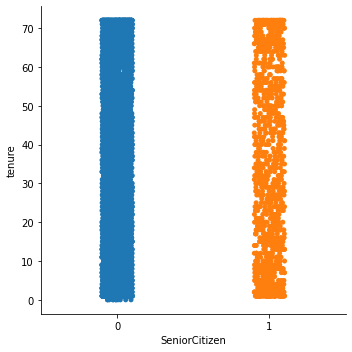

In [67]:
sns.catplot(x='SeniorCitizen', y='tenure', data=ds)

In [68]:
# checking the distibution of continuous columns float values

In [69]:
ds_visualization_continuous=ds[['MonthlyCharges', 'TotalCharges']].copy()

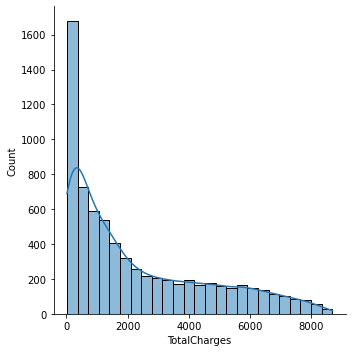

In [70]:
import seaborn as sns

sns.displot(ds_visualization_continuous['TotalCharges'], kde=True)

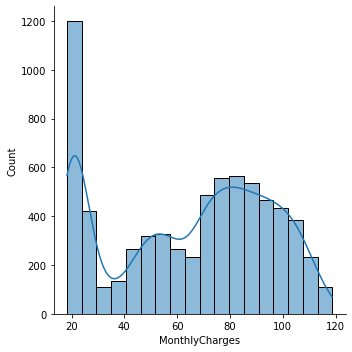

In [71]:
sns.displot(ds_visualization_continuous['MonthlyCharges'], kde=True)

In [72]:
# as we can see this doesnot follow the noral distribution. the mothly charges graph is bimodial distribution and skewed

The above dataset has lot of string or object variable so we will use Encoding techniques totransfrom the data to numerical one.

In [73]:
# Encoding the dataset

import sklearn
from sklearn.preprocessing import OrdinalEncoder
enc=OrdinalEncoder()

In [74]:
for i in ds.columns:
    if ds[i].dtypes=='object':
        ds[i]=enc.fit_transform(ds[i].values.reshape(-1,1))

In [75]:
ds

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5375.0,0.0,0,1.0,0.0,1,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,2.0,29.85,29.85,0.0
1,3962.0,1.0,0,0.0,0.0,34,1.0,0.0,0.0,2.0,...,2.0,0.0,0.0,0.0,1.0,0.0,3.0,56.95,1889.50,0.0
2,2564.0,1.0,0,0.0,0.0,2,1.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,1.0,3.0,53.85,108.15,1.0
3,5535.0,1.0,0,0.0,0.0,45,0.0,1.0,0.0,2.0,...,2.0,2.0,0.0,0.0,1.0,0.0,0.0,42.30,1840.75,0.0
4,6511.0,0.0,0,0.0,0.0,2,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,2.0,70.70,151.65,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,4853.0,1.0,0,1.0,1.0,24,1.0,2.0,0.0,2.0,...,2.0,2.0,2.0,2.0,1.0,1.0,3.0,84.80,1990.50,0.0
7039,1525.0,0.0,0,1.0,1.0,72,1.0,2.0,1.0,0.0,...,2.0,0.0,2.0,2.0,1.0,1.0,1.0,103.20,7362.90,0.0
7040,3367.0,0.0,0,1.0,1.0,11,0.0,1.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,1.0,2.0,29.60,346.45,0.0
7041,5934.0,1.0,1,1.0,0.0,4,1.0,2.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,3.0,74.40,306.60,1.0


In [76]:
# describe the dataset
# only continuous columns can be seen

ds.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
customerID,7043.0,3521.000000,2033.283305,0.00,1760.500,3521.00,5281.50,7042.00
gender,7043.0,0.504756,0.500013,0.00,0.000,1.00,1.00,1.00
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.000,0.00,0.00,1.00
Partner,7043.0,0.483033,0.499748,0.00,0.000,0.00,1.00,1.00
Dependents,7043.0,0.299588,0.458110,0.00,0.000,0.00,1.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.000,29.00,55.00,72.00
PhoneService,7043.0,0.903166,0.295752,0.00,1.000,1.00,1.00,1.00
MultipleLines,7043.0,0.940508,0.948554,0.00,0.000,1.00,2.00,2.00
InternetService,7043.0,0.872923,0.737796,0.00,0.000,1.00,1.00,2.00
OnlineSecurity,7043.0,0.790004,0.859848,0.00,0.000,1.00,2.00,2.00


<AxesSubplot:>

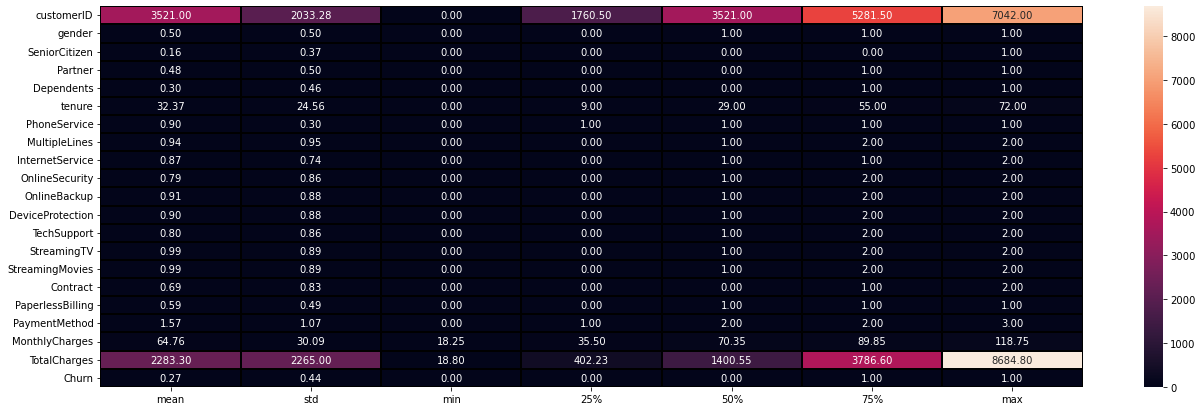

In [77]:
import matplotlib.pyplot as plt

plt.figure(figsize=(22,7))
sns.heatmap(ds.describe()[1:].transpose(), annot=True, linewidth=0.1, linecolor='black', fmt='0.2f')

In [78]:
# check correlation of the columns with the Target column

In [79]:
ds.corr()['Churn'].sort_values()

Contract           -0.396713
tenure             -0.352229
OnlineSecurity     -0.289309
TechSupport        -0.282492
TotalCharges       -0.199428
OnlineBackup       -0.195525
DeviceProtection   -0.178134
Dependents         -0.164221
Partner            -0.150448
InternetService    -0.047291
StreamingMovies    -0.038492
StreamingTV        -0.036581
customerID         -0.017447
gender             -0.008612
PhoneService        0.011942
MultipleLines       0.038037
PaymentMethod       0.107062
SeniorCitizen       0.150889
PaperlessBilling    0.191825
MonthlyCharges      0.193356
Churn               1.000000
Name: Churn, dtype: float64

<AxesSubplot:>

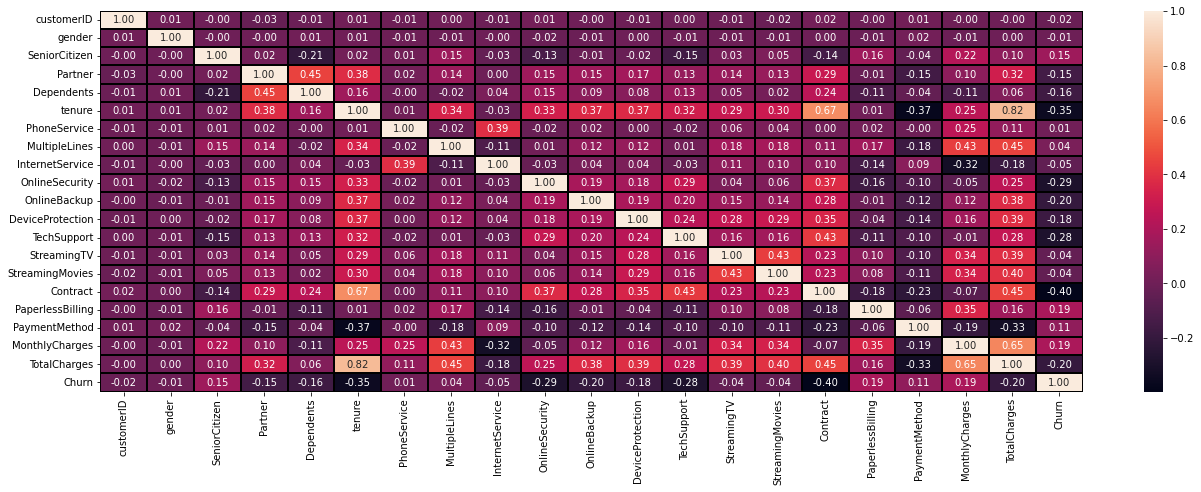

In [80]:
plt.figure(figsize=(22,7))
sns.heatmap(ds.corr(),annot=True,linewidth=0.1,linecolor='black',fmt='0.2f',)

checking the columns which are positively and negatively correlated with the target column

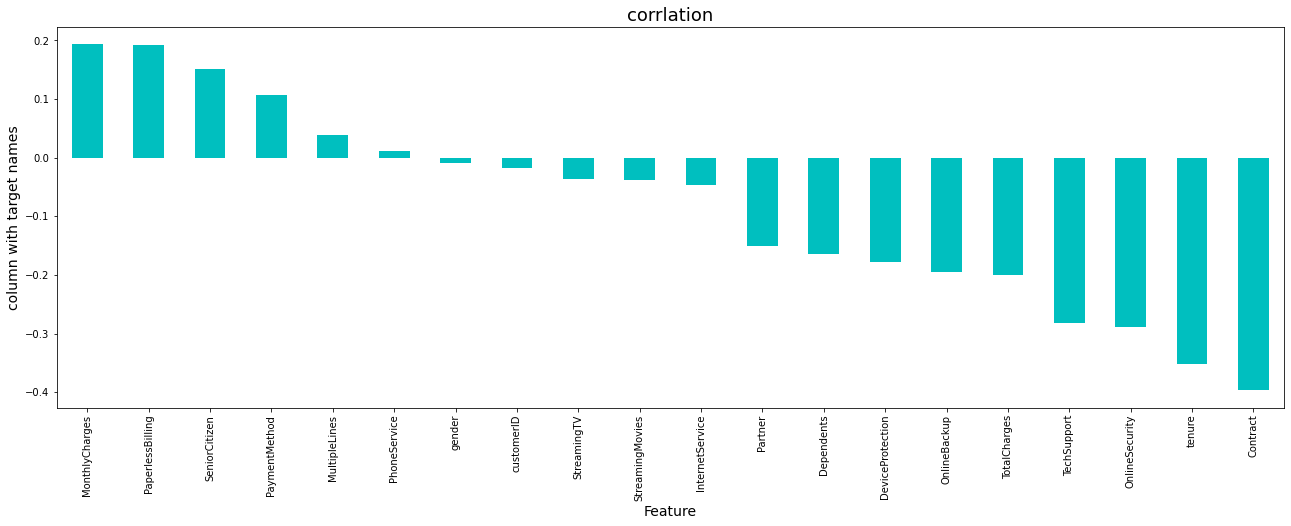

In [81]:
plt.figure(figsize=(22,7))
ds.corr()['Churn'].sort_values(ascending=False).drop(['Churn']).plot(kind='bar', color='c')
plt.xlabel('Feature', fontsize=14)
plt.ylabel('column with target names',fontsize=14)
plt.title('corrlation', fontsize=18)
plt.show()


# check skewness

In [82]:
ds.skew().sort_values()

PhoneService       -2.727153
PaperlessBilling   -0.375396
MonthlyCharges     -0.220524
PaymentMethod      -0.170129
gender             -0.019031
customerID          0.000000
StreamingMovies     0.014657
StreamingTV         0.028486
Partner             0.067922
MultipleLines       0.118719
OnlineBackup        0.182930
DeviceProtection    0.186847
InternetService     0.205423
tenure              0.239540
TechSupport         0.402365
OnlineSecurity      0.416985
Contract            0.630959
Dependents          0.875199
TotalCharges        0.962394
Churn               1.063031
SeniorCitizen       1.833633
dtype: float64

In [83]:
# ideally it should be zero but in real life dataset it cant be . but we can keep it min +/-0.5 as the range for the skewness, here are the columns which does not lie within this range
#. senior citizen
#. dependents
#.phone service
#.contract
#.total charges
#.churn

# we ra enot treating them beacause they are categorical variables 

In [84]:
# since no column has skewness , we will not treat that

In [85]:
# Outliers check

ds.dtypes

customerID          float64
gender              float64
SeniorCitizen         int64
Partner             float64
Dependents          float64
tenure                int64
PhoneService        float64
MultipleLines       float64
InternetService     float64
OnlineSecurity      float64
OnlineBackup        float64
DeviceProtection    float64
TechSupport         float64
StreamingTV         float64
StreamingMovies     float64
Contract            float64
PaperlessBilling    float64
PaymentMethod       float64
MonthlyCharges      float64
TotalCharges        float64
Churn               float64
dtype: object

In [86]:
# checking the outliers on the int and float type columns

<AxesSubplot:>

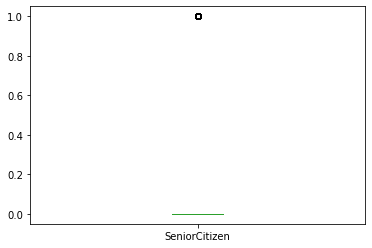

In [87]:
ds['SeniorCitizen'].plot.box()

<AxesSubplot:>

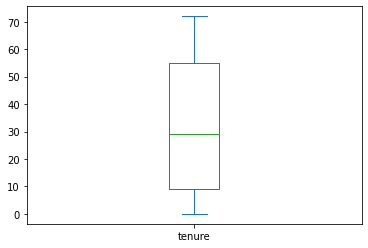

In [88]:
ds['tenure'].plot.box()

<AxesSubplot:>

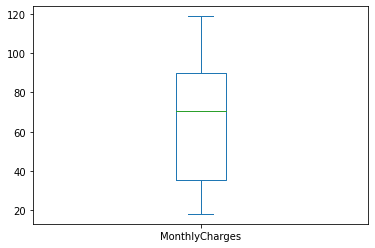

In [89]:
ds['MonthlyCharges'].plot.box()

<AxesSubplot:>

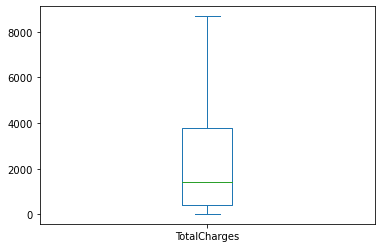

In [90]:
ds['TotalCharges'].plot.box()

In [91]:
plot a ox plot with subplots for all columns

SyntaxError: invalid syntax (Temp/ipykernel_7792/3815129555.py, line 1)

In [92]:
# cosidering outliers removal

In [93]:
ds.shape

(7043, 21)

In [94]:
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(ds))
threshold=3
np.where(z>3)

(array([   0,    3,    7,   20,   27,   62,   81,   89,  103,  105,  107,
         114,  116,  129,  131,  133,  168,  180,  185,  187,  206,  211,
         215,  216,  217,  225,  236,  252,  255,  259,  260,  263,  272,
         278,  303,  321,  324,  328,  348,  354,  358,  372,  376,  382,
         387,  398,  424,  431,  435,  452,  465,  481,  488,  495,  498,
         544,  569,  596,  610,  616,  620,  634,  660,  667,  669,  674,
         677,  688,  716,  718,  735,  765,  776,  784,  790,  794,  813,
         829,  843,  847,  859,  866,  873,  875,  877,  884,  893,  917,
         934,  941,  943,  960,  973, 1011, 1018, 1037, 1050, 1051, 1053,
        1072, 1110, 1119, 1122, 1144, 1146, 1150, 1161, 1169, 1182, 1204,
        1221, 1225, 1242, 1255, 1257, 1271, 1278, 1298, 1311, 1326, 1331,
        1333, 1334, 1340, 1349, 1352, 1365, 1379, 1402, 1407, 1416, 1452,
        1479, 1480, 1481, 1500, 1506, 1513, 1519, 1560, 1562, 1581, 1584,
        1614, 1620, 1634, 1637, 1652, 

In [95]:
ds_new_z=ds[(z<3).all(axis=1)]
ds_new_z

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1,3962.0,1.0,0,0.0,0.0,34,1.0,0.0,0.0,2.0,...,2.0,0.0,0.0,0.0,1.0,0.0,3.0,56.95,1889.50,0.0
2,2564.0,1.0,0,0.0,0.0,2,1.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,1.0,3.0,53.85,108.15,1.0
4,6511.0,0.0,0,0.0,0.0,2,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,2.0,70.70,151.65,1.0
5,6551.0,0.0,0,0.0,0.0,8,1.0,2.0,1.0,0.0,...,2.0,0.0,2.0,2.0,0.0,1.0,2.0,99.65,820.50,1.0
6,1002.0,1.0,0,0.0,1.0,22,1.0,2.0,1.0,0.0,...,0.0,0.0,2.0,0.0,0.0,1.0,1.0,89.10,1949.40,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7037,1758.0,0.0,0,0.0,0.0,72,1.0,0.0,2.0,1.0,...,1.0,1.0,1.0,1.0,2.0,1.0,0.0,21.15,1419.40,0.0
7038,4853.0,1.0,0,1.0,1.0,24,1.0,2.0,0.0,2.0,...,2.0,2.0,2.0,2.0,1.0,1.0,3.0,84.80,1990.50,0.0
7039,1525.0,0.0,0,1.0,1.0,72,1.0,2.0,1.0,0.0,...,2.0,0.0,2.0,2.0,1.0,1.0,1.0,103.20,7362.90,0.0
7041,5934.0,1.0,1,1.0,0.0,4,1.0,2.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,3.0,74.40,306.60,1.0


In [96]:
# we will not going to apply any outlers removing technique becos outliers are present in categirical column

In [97]:
#let us drop the Customer id 

ds.drop(['customerID'],axis=1, inplace=True)
ds

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0.0,0,1.0,0.0,1,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,29.85,29.85,0.0
1,1.0,0,0.0,0.0,34,1.0,0.0,0.0,2.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,3.0,56.95,1889.50,0.0
2,1.0,0,0.0,0.0,2,1.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,53.85,108.15,1.0
3,1.0,0,0.0,0.0,45,0.0,1.0,0.0,2.0,0.0,2.0,2.0,0.0,0.0,1.0,0.0,0.0,42.30,1840.75,0.0
4,0.0,0,0.0,0.0,2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,70.70,151.65,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1.0,0,1.0,1.0,24,1.0,2.0,0.0,2.0,0.0,2.0,2.0,2.0,2.0,1.0,1.0,3.0,84.80,1990.50,0.0
7039,0.0,0,1.0,1.0,72,1.0,2.0,1.0,0.0,2.0,2.0,0.0,2.0,2.0,1.0,1.0,1.0,103.20,7362.90,0.0
7040,0.0,0,1.0,1.0,11,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,29.60,346.45,0.0
7041,1.0,1,1.0,0.0,4,1.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,74.40,306.60,1.0


In [98]:
# seperating the columns into idependent(features) and Target:

In [99]:
features=ds.drop('Churn', axis=1)
target=ds['Churn']

In [100]:
# scaling the data using Min-Max Scaler:

In [101]:
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler()

In [102]:
x=ds.iloc[:,:-1]
x.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0.0,0,1.0,0.0,1,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,29.85,29.85
1,1.0,0,0.0,0.0,34,1.0,0.0,0.0,2.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,3.0,56.95,1889.50
2,1.0,0,0.0,0.0,2,1.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,53.85,108.15
3,1.0,0,0.0,0.0,45,0.0,1.0,0.0,2.0,0.0,2.0,2.0,0.0,0.0,1.0,0.0,0.0,42.30,1840.75
4,0.0,0,0.0,0.0,2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,70.70,151.65


In [103]:
y=ds.iloc[:,-1]
y.head()

0    0.0
1    0.0
2    1.0
3    0.0
4    1.0
Name: Churn, dtype: float64

In [104]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=.20, random_state=0)


print(" x_train dataset: ", x_train.shape)
print(" y_train dataset: ", y_train.shape)
print(" x_test dataset: ", x_test.shape)
print(" y_test dataset: ", y_test.shape)

 x_train dataset:  (5634, 19)
 y_train dataset:  (5634,)
 x_test dataset:  (1409, 19)
 y_test dataset:  (1409,)


In [105]:
from sklearn import model_selection
from sklearn import metrics

from sklearn import svm, tree, linear_model, neighbors
from sklearn import naive_bayes, ensemble, gaussian_process
from sklearn.neighbors import KNeighborsClassifier


from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [106]:
# sklearn modules for Model evaluation and improvement

from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import f1_score,precision_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

from sklearn import feature_selection
from sklearn.metrics import classification_report, precision_recall_curve
from sklearn.metrics import auc, roc_auc_score, roc_curve
from sklearn.metrics import average_precision_score


In [107]:
lr=LogisticRegression()
dtc=DecisionTreeClassifier()
svc=SVC()
gnb=GaussianNB()
knn=KNeighborsClassifier()
rfc=RandomForestClassifier()
gbc=GradientBoostingClassifier()


model=[lr,dtc,svc,gnb,knn,rfc,gbc]

for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm=m.predict(x_test)
    print('Accuracy score of ', m, 'is:')
    print(accuracy_score(y_test,predm))
    print(confusion_matrix(y_test,predm))
    print(classification_report(y_test,predm))
    print(precision_recall_curve(y_test,predm))
    print('\n')

Accuracy score of  LogisticRegression() is:
0.794180269694819
[[923 118]
 [172 196]]
              precision    recall  f1-score   support

         0.0       0.84      0.89      0.86      1041
         1.0       0.62      0.53      0.57       368

    accuracy                           0.79      1409
   macro avg       0.73      0.71      0.72      1409
weighted avg       0.79      0.79      0.79      1409

(array([0.26117814, 0.62420382, 1.        ]), array([1.       , 0.5326087, 0.       ]), array([0., 1.]))


Accuracy score of  DecisionTreeClassifier() is:
0.7217885024840313
[[833 208]
 [184 184]]
              precision    recall  f1-score   support

         0.0       0.82      0.80      0.81      1041
         1.0       0.47      0.50      0.48       368

    accuracy                           0.72      1409
   macro avg       0.64      0.65      0.65      1409
weighted avg       0.73      0.72      0.72      1409

(array([0.26117814, 0.46938776, 1.        ]), array([1. , 0.5, 0

In [108]:
predm

array([0., 0., 0., ..., 0., 0., 1.])

In [109]:
# checking Cross validation scores for all models

In [110]:
score=cross_val_score(gnb,x,y,cv=5)
print(score)
print(score.mean())
print(score.std())

[0.75372605 0.75798439 0.74024131 0.76065341 0.75284091]
0.7530892114007355
0.007024467401013723


In [111]:
score=cross_val_score(svc,x,y,cv=10)
print(score)
print(score.mean())
print(score.std())

[0.73475177 0.73475177 0.73475177 0.73579545 0.734375   0.734375
 0.734375   0.734375   0.734375   0.734375  ]
0.7346300773694391
0.00042342889184847013


In [112]:
score=cross_val_score(dtc,x,y,cv=5)
print(score)
print(score.mean())
print(score.std())

[0.74449965 0.73030518 0.71682044 0.70951705 0.73579545]
0.7273875532292406
0.012673184092912371


In [113]:
score=cross_val_score(knn,x,y,cv=5)
print(score)
print(score.mean())
print(score.std())

[0.75301632 0.77288857 0.75869411 0.75639205 0.76988636]
0.7621754830956836
0.007793411323797834


In [114]:
score=cross_val_score(lr,x,y,cv=10)
print(score)
print(score.mean())
print(score.std())

[0.80567376 0.8070922  0.78865248 0.81960227 0.79829545 0.78693182
 0.80965909 0.80113636 0.79545455 0.80823864]
0.8020736621534494
0.009535794800298094


In [115]:
score=cross_val_score(rfc,x,y,cv=10)
print(score)
print(score.mean())
print(score.std())

[0.79574468 0.80425532 0.79007092 0.79261364 0.78409091 0.77272727
 0.81107955 0.79829545 0.79829545 0.79829545]
0.7945468649258544
0.010101322677133108


In [116]:
# to improve the model we will use adaoost classifer

In [117]:
from sklearn.ensemble import AdaBoostClassifier
ad=AdaBoostClassifier(n_estimators=50)
ad.fit(x_train,y_train)
ad_pred=ad.predict(x_test)
print(accuracy_score(y_test,ad_pred))
print(confusion_matrix(y_test,ad_pred))
print(classification_report(y_test,ad_pred))

0.7856635911994322
[[914 127]
 [175 193]]
              precision    recall  f1-score   support

         0.0       0.84      0.88      0.86      1041
         1.0       0.60      0.52      0.56       368

    accuracy                           0.79      1409
   macro avg       0.72      0.70      0.71      1409
weighted avg       0.78      0.79      0.78      1409



In [118]:
classifier = LogisticRegression(random_state = 0,
penalty = 'none')
classifier.fit(x_train, y_train)
# Predict the Test set results
y_pred = classifier.predict(x_test)
#Evaluate Model Results on Test Set:
acc = accuracy_score(y_test, y_pred )
prec = precision_score(y_test, y_pred )
f1 = f1_score(y_test, y_pred )

results = pd.DataFrame([['Logistic Regression',
acc, prec, f1]],columns = ['Model', 'Accuracy', 'Precision', 'F1 Score',])
print (results)

                 Model  Accuracy  Precision  F1 Score
0  Logistic Regression  0.793471   0.619195  0.578871


In [119]:
classifier = LogisticRegression(random_state = 0,
penalty = 'l2')
classifier.fit(x_train, y_train)
# Predict the Test set results
y_pred = classifier.predict(x_test)
#Evaluate Model Results on Test Set:
acc = accuracy_score(y_test, y_pred )
prec = precision_score(y_test, y_pred )
f1 = f1_score(y_test, y_pred )

results = pd.DataFrame([['Logistic Regression',
acc, prec, f1]],columns = ['Model', 'Accuracy', 'Precision', 'F1 Score',])
print (results)

                 Model  Accuracy  Precision  F1 Score
0  Logistic Regression   0.79418   0.624204   0.57478


confusion matrix

Text(0.5, 8.5, 'Predicted label\n')

<Figure size 2016x1440 with 0 Axes>

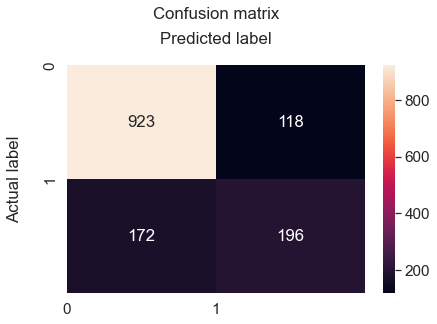

In [135]:
cm = confusion_matrix(y_test, y_pred) 
df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (28,20))
fig, ax = plt.subplots()
sns.set(font_scale=1.4)
sns.heatmap(df_cm, annot=True, fmt='g'#,cmap="YlGnBu" 
           )
class_names=[0,1]
tick_marks = np.arange(len(class_names))
plt.tight_layout()
plt.title('Confusion matrix\n', y=1.1)
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
ax.xaxis.set_label_position("top")
plt.ylabel('Actual label\n')
plt.xlabel('Predicted label\n')



ROC Graph

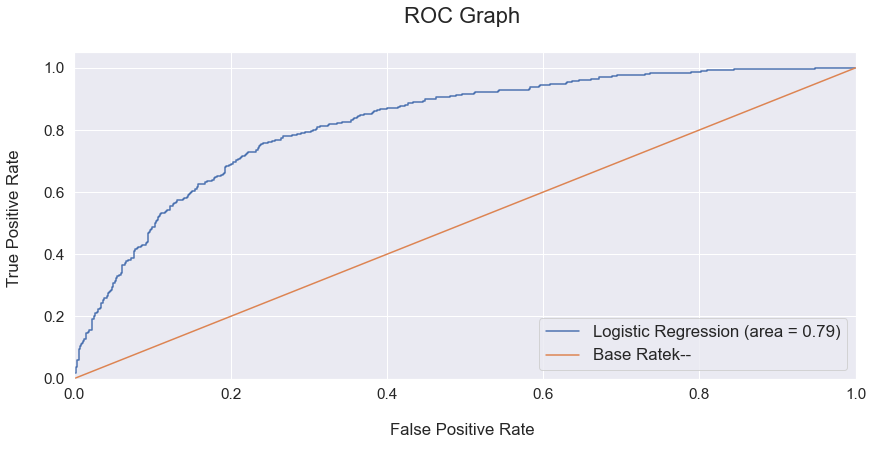

In [130]:
classifier.fit(x_train, y_train) 
probs = classifier.predict_proba(x_test) 
probs = probs[:, 1] 
classifier_roc_auc = accuracy_score(y_test, y_pred )
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, classifier.predict_proba(x_test)[:,1])
plt.figure(figsize=(14, 6))
# Plot Logistic Regression ROC
plt.plot(rf_fpr, rf_tpr, 
label='Logistic Regression (area = %0.2f)' % classifier_roc_auc)
# Plot Base Rate ROC
plt.plot([0,1], [0,1],label='Base Rate' 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.ylabel('True Positive Rate \n',horizontalalignment="center",
fontstyle = "normal", fontsize = "medium", 
fontfamily = "sans-serif")
plt.xlabel('\nFalse Positive Rate \n',horizontalalignment="center",
fontstyle = "normal", fontsize = "medium", 
fontfamily = "sans-serif")
plt.title('ROC Graph \n',horizontalalignment="center", 
fontstyle = "normal", fontsize = "22", 
fontfamily = "sans-serif")
plt.legend(loc="lower right", fontsize = "medium")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")
plt.show()

# Hyperparameter Tuning using Gridsearch cv

In [120]:
# Round 1:
 
# Select Regularization Method   
import time
penalty = ['l1', 'l2']
# Create regularization hyperparameter space
C = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
# Combine Parameters
parameters = dict(C=C, penalty=penalty)
lr_classifier = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = "balanced_accuracy",
                           cv = 10,
                           n_jobs = -1)
t0 = time.time()
lr_classifier  = lr_classifier .fit(x_train, y_train)
t1 = time.time()
print("Took %0.2f seconds" % (t1 - t0))

lr_best_accuracy = lr_classifier.best_score_
lr_best_parameters = lr_classifier.best_params_
lr_best_accuracy, lr_best_parameters

Took 8.81 seconds


(0.7265448309070293, {'C': 10, 'penalty': 'l2'})

In [121]:
# Round 2:
# Select Regularization Method
import time
penalty = ['l2']
# Create regularization hyperparameter space
C = [ 0.0001, 0.001, 0.01, 0.02, 0.05]
# Combine Parameters
parameters = dict(C=C, penalty=penalty)
lr_classifier = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = "balanced_accuracy",
                           cv = 10,
                           n_jobs = -1)
t0 = time.time()
lr_classifier  = lr_classifier .fit(x_train, y_train)
t1 = time.time()
print("Took %0.2f seconds" % (t1 - t0))
lr_best_accuracy = lr_classifier.best_score_
lr_best_parameters = lr_classifier.best_params_
lr_best_accuracy, lr_best_parameters

Took 2.94 seconds


(0.7250286765014032, {'C': 0.01, 'penalty': 'l2'})

Final Hyperparameter tuning and selection

In [131]:
lr_classifier = LogisticRegression(random_state = 0, penalty = 'l2')
lr_classifier.fit(x_train, y_train)
# Predict the Test set results
y_pred = lr_classifier.predict(x_test)
#probability score
y_pred_probs = lr_classifier.predict_proba(x_test)
y_pred_probs  = y_pred_probs [:, 1]

[[923 118]
 [172 196]]
Test Data Accuracy: 0.7942


<Figure size 2016x1440 with 0 Axes>

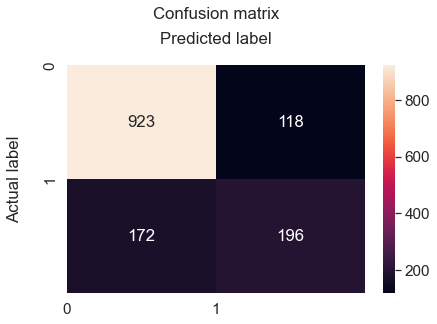

In [133]:
#Revalidate final results with Confusion Matrix:
cm = confusion_matrix(y_test, y_pred) 
print (cm)
#Confusion Matrix as a quick Crosstab:
    
pd.crosstab(y_test,pd.Series(y_pred),
rownames=['ACTUAL'],colnames=['PRED'])
#visualize Confusion Matrix:
cm = confusion_matrix(y_test, y_pred) 
df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (28,20))
fig, ax = plt.subplots()
sns.set(font_scale=1.4)
sns.heatmap(df_cm, annot=True, fmt='g'#,cmap="YlGnBu" 
           )
class_names=[0,1]
tick_marks = np.arange(len(class_names))
plt.tight_layout()
plt.title('Confusion matrix\n', y=1.1)
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
ax.xaxis.set_label_position("top")
plt.ylabel('Actual label\n')
plt.xlabel('Predicted label\n')
print("Test Data Accuracy: %0.4f" % accuracy_score(y_test, y_pred))

In [1]:
# saving the model

In [137]:
import pickle
filename='picklelrfile.pkl'
pickle.dump(lr,open(filename, 'wb'))


In [139]:
loaded_model=pickle.load(open(filename, 'rb'))
loaded_model.predict(x_test)

array([0., 0., 0., ..., 0., 0., 1.])